In [36]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [37]:
df = pd.read_csv("data.csv", index_col = 'CUST_ID')

In [38]:
df.head()
# df.columns

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


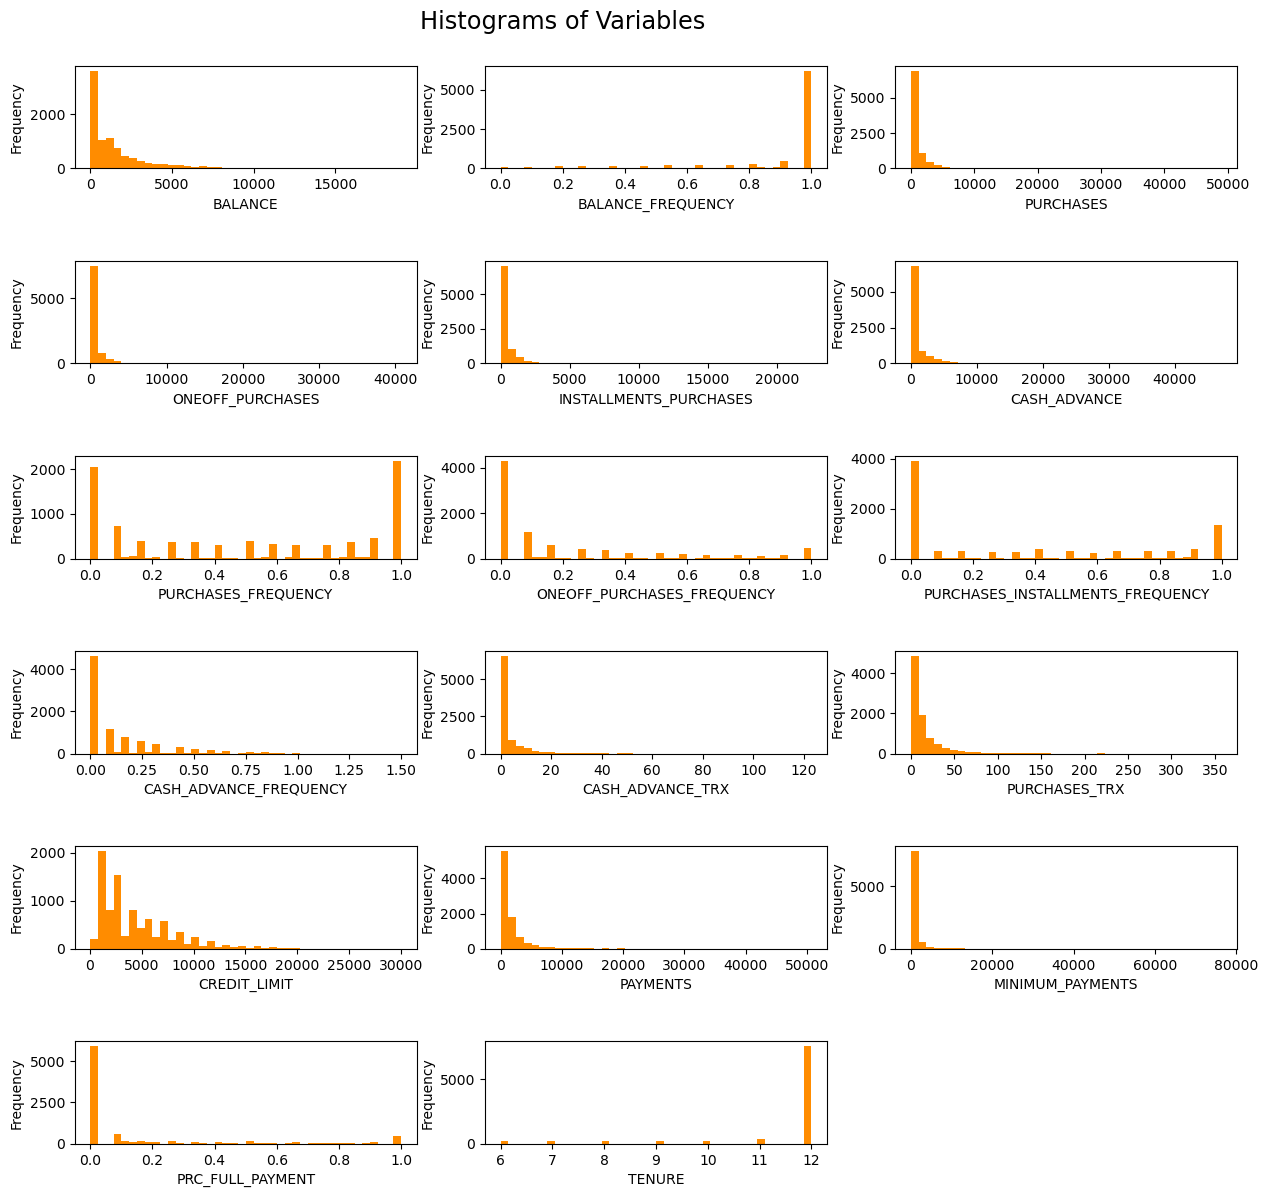

In [39]:
# Plot histograms for each variable
colors = ['darkorange']
plt.figure(figsize=(15, 14))
plt.suptitle('Histograms of Variables', x=0.45, y=0.92, ha='center', fontsize='xx-large')
for i, col in enumerate(df.columns, 1):
    plt.subplot(6, 3, i)  # Adjust the number of rows and columns
    plt.hist(df[col], bins=40, color=colors)
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust hspace for space between subplots
plt.subplots_adjust(hspace=0.9)
plt.show()

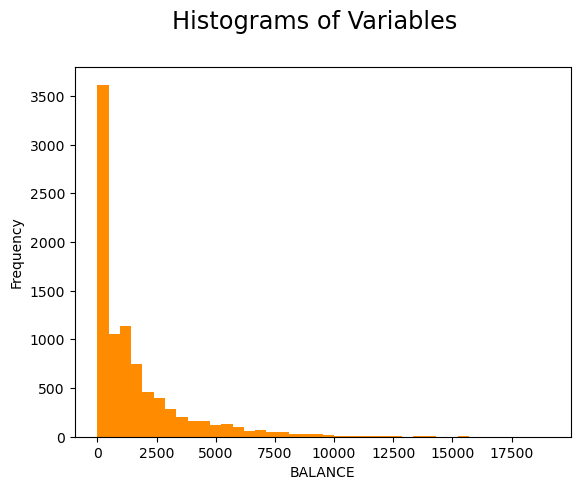

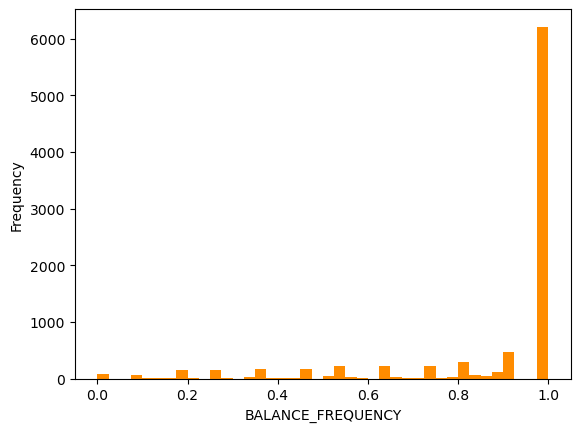

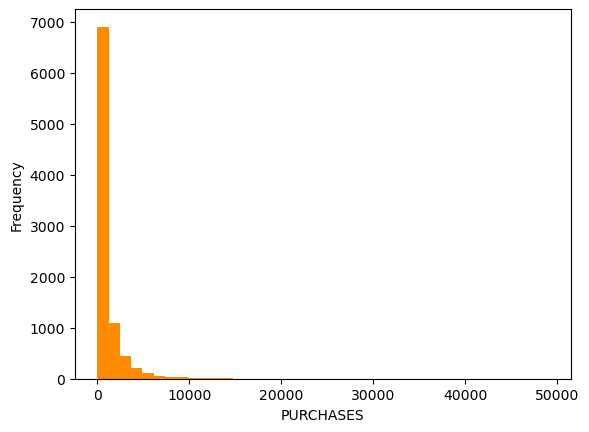

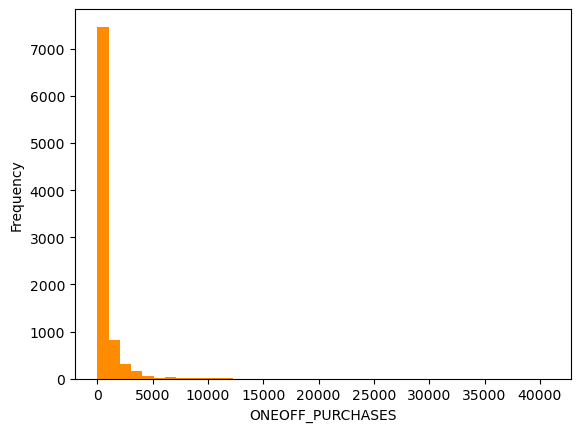

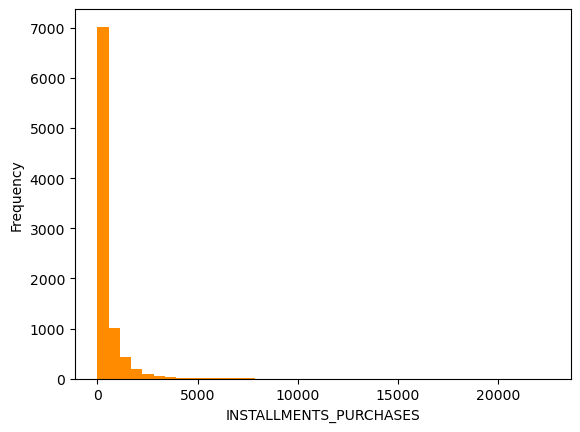

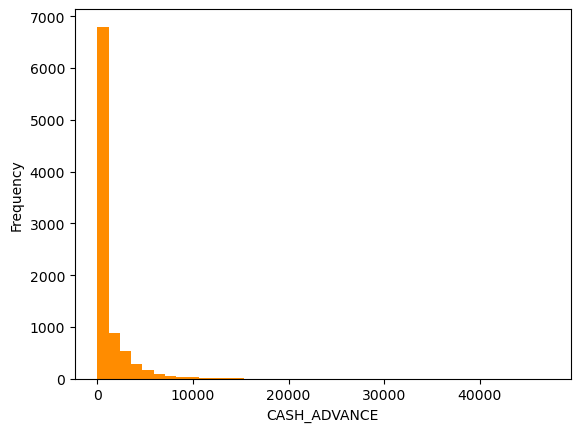

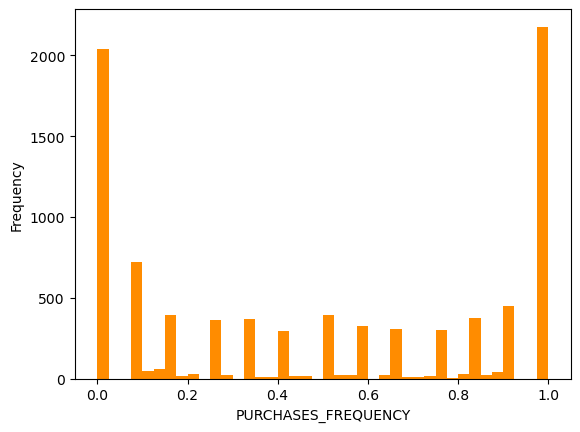

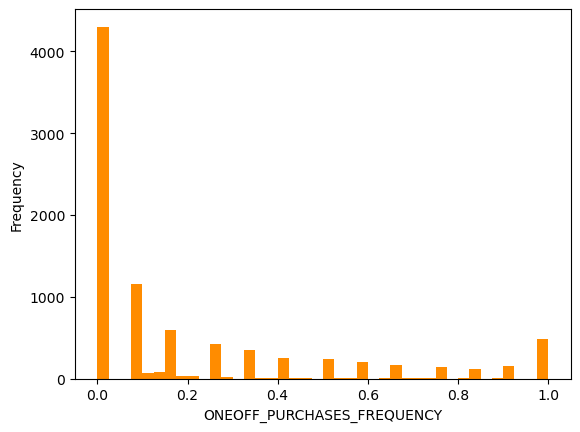

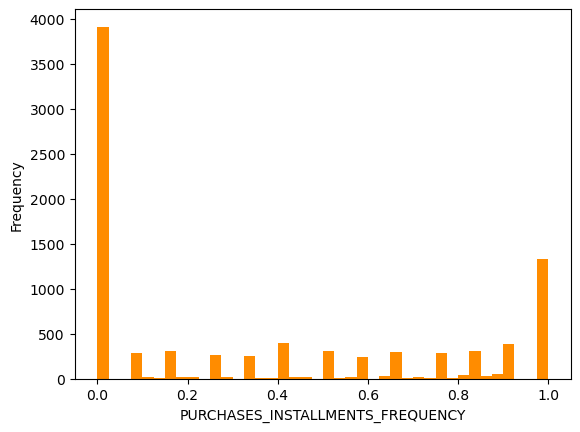

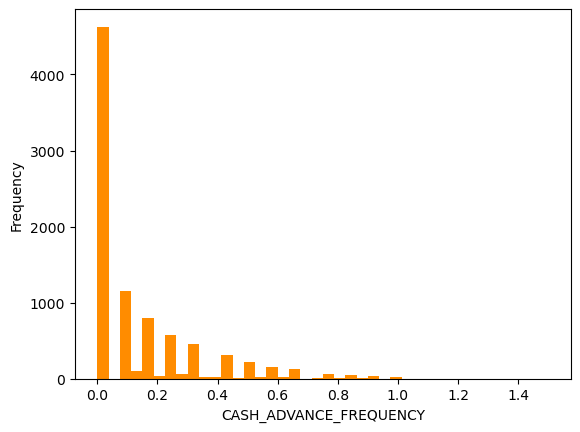

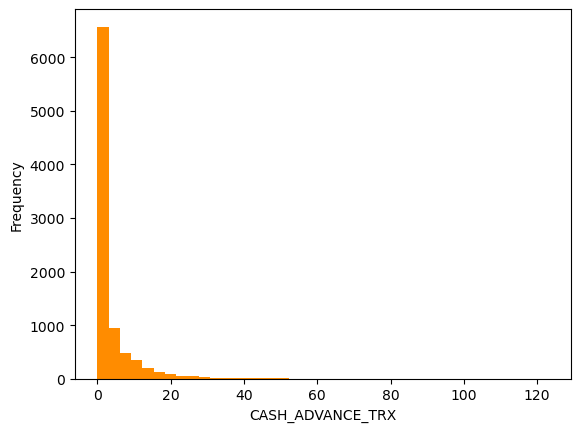

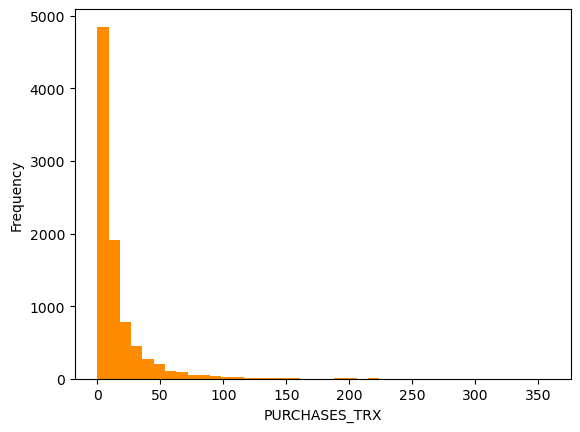

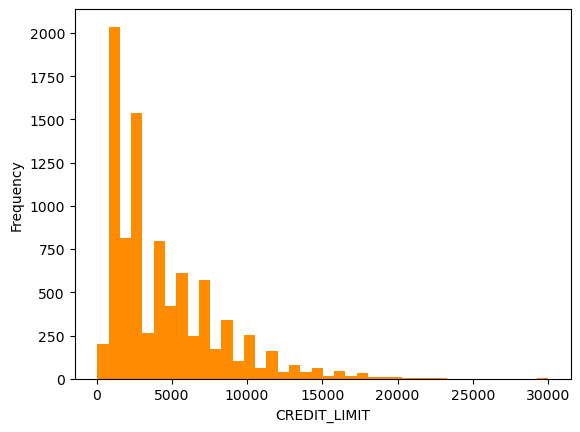

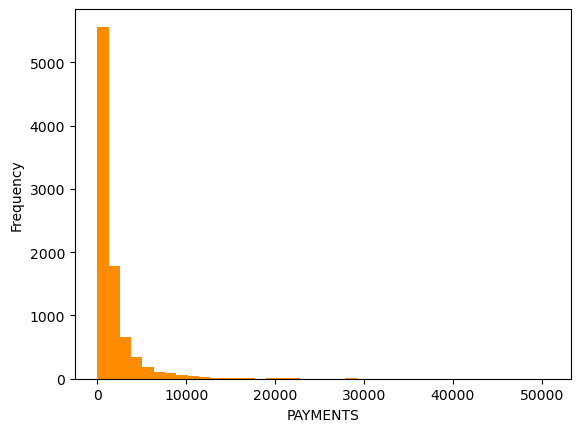

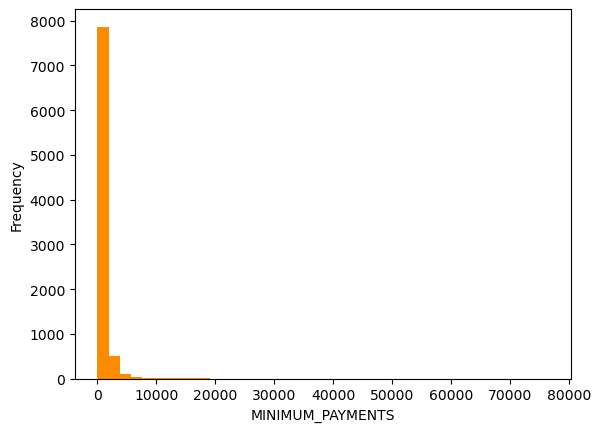

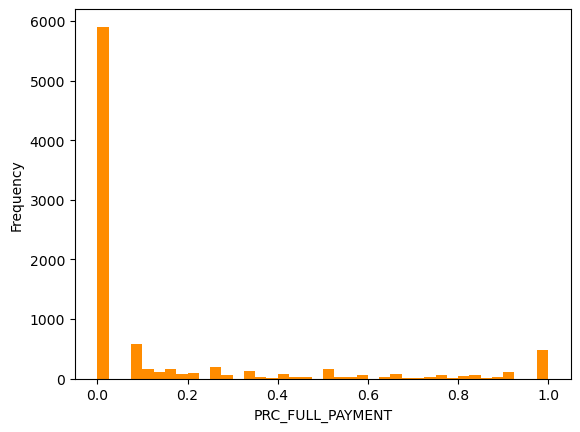

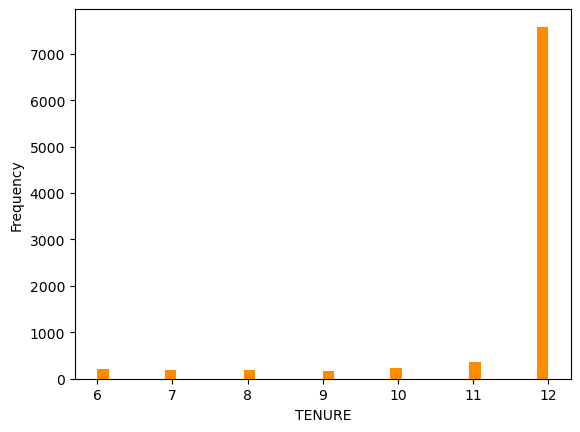

In [121]:
# Enlarge plots to identify less frequent values
plt.suptitle('Histograms of Variables', x=0.5, y=1.0, ha='center', fontsize='xx-large')
for col in df.columns:
    plt.hist(df[col], bins=40, color=colors)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.subplots_adjust(hspace=1)
    plt.show()

In [40]:
# Correlation between variables
# df.corr()

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

The above histograms reveal several key insights about the credit card usage patterns of the individuals represented in the dataset. The right-skewed distributions observed for many variables, such as balance, purchases, one-off purchases, installments purchases, cash advance, payments, and minimum payments, indicate that a small portion of users exhibit extreme behavior, such as carrying high balances, making large purchases, or taking substantial cash advances. This suggests that the dataset encompasses a diverse range of credit card users, from those who utilize their cards sparingly to those who rely on them heavily.

Further analysis of specific variables provides additional insights like:
Tenure: The histogram for tenure suggests that the average credit card user has held their card for several years, implying a long-standing relationship with the credit card provider.

Purchases / Credit Limit: The histogram for purchases / credit limit indicates that most users utilize less than 20% of their credit limit each month, suggesting a cautious approach to credit utilization.

Payments / Balance: The histogram for payments / balance reveals that most users make payments that cover less than 10% of their balance each month, implying a tendency to carry a significant portion of their balance over time.

Cash Advance / Credit Limit: The histogram for cash advance / credit limit suggests that most users take cash advances that are less than 5% of their credit limit, indicating that cash advances are not a primary form of credit utilization.

Overall, we can say that the right-skewed distributions and further analysis of specific variables suggest that while the majority of users exhibit moderate credit utilization, a small subset of users engage in extreme behaviors, such as carrying high balances or making large purchases.

We can also say that there are strong positive and negative correlations between many of the variables. For example, there is a strong positive correlation between oneoff purchases and purchases. This suggests that the variables are related to each other, and that changes in one variable may lead to changes in the others. So, we need to select features accordingly since highly correlated features can lead to multicollinearity, which can make it difficult to interpret the results of a model. And including all these features in a model, it is possible that the model would overfit the training data and not perform well on new data. This is because the model would be relying too heavily on the correlations between the features, and it would not be able to generalize to new data that does not have the same correlations.

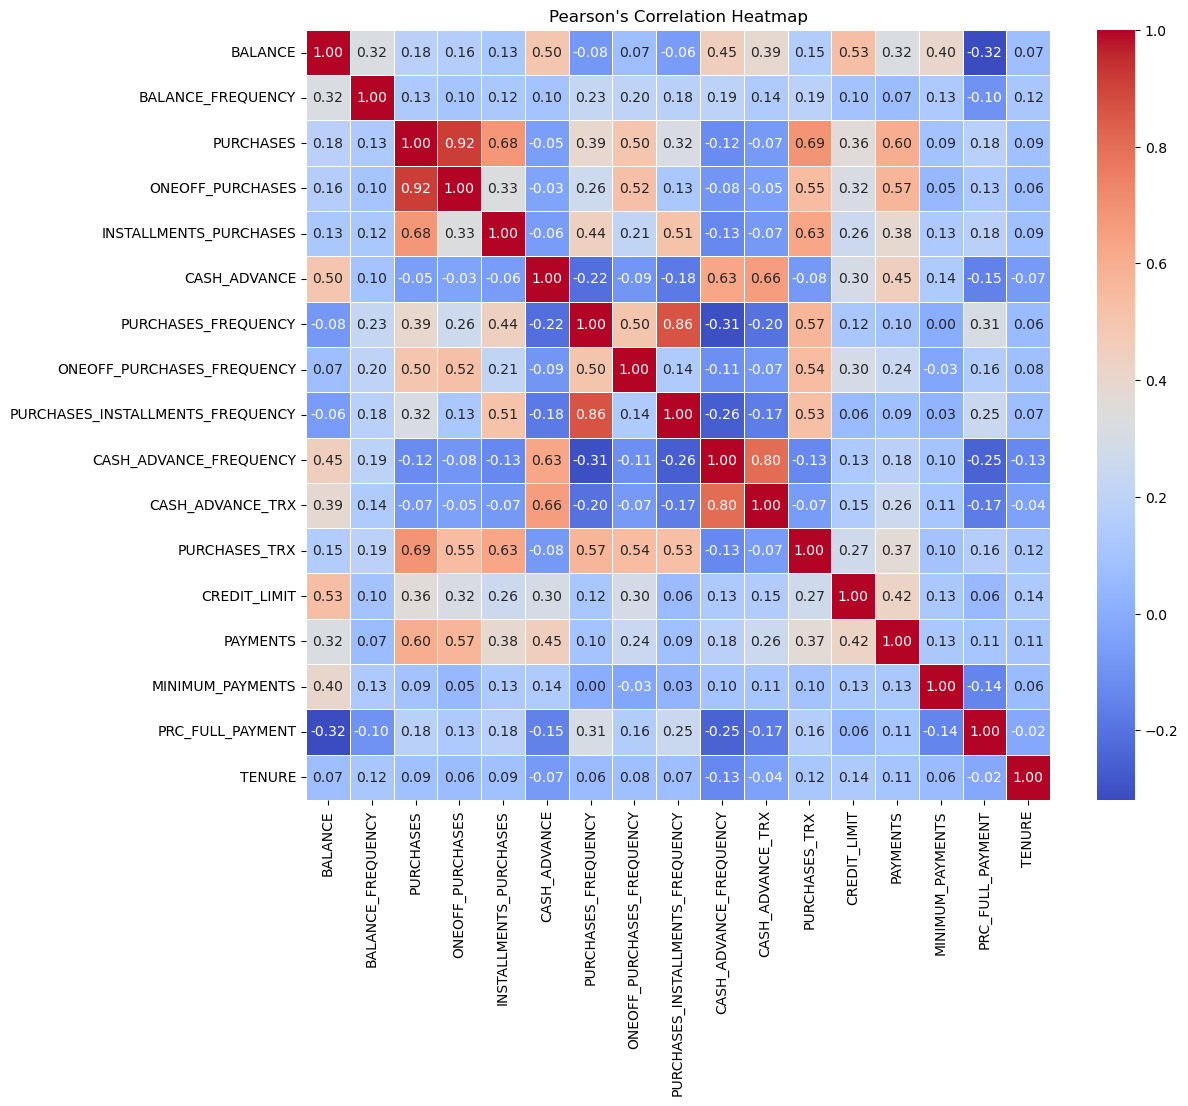

In [41]:
# Compute Pearson's correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Pearson's Correlation Heatmap")
plt.show()

The heatmap shows the correlation between the variables. The darker the color, the stronger the correlation. There are a few potential associations between the considered variables that can be observed from the heatmap:

Highly Positive Correlations:

a. One-off Purchases and Installments Purchases (0.92):
One-off purchases and Installments purchases are also strongly correlated with each other. This suggests that customers who make one-off purchases are also more likely to make installment purchases.

b. Purchases TRX and INSTALLMENTS Purchases Frequency (0.86):
The strong positive correlation between the number of purchase transactions (TRX) and the frequency of installment purchases suggests a significant association. Customers who engage in more transactions also tend to make more frequent installment purchases.

c. Cash Advance frequency and Cash Advance Transaction (0.80):
This means that as the frequency of cash advances increases, the total number of cash advance transactions also tends to increase. In other words, customers who frequently engage in cash advances are likely to conduct more individual transactions involving cash advances.

In the above heatmap there are no highly negative correlations between variables although there are some negative correlations which suggets inverse dependency.

It is also important to note that correlation does not imply causation. Just because two variables are correlated does not mean that one causes the other. For example, the fact that balance is correlated with one-off purchases does not mean that having a higher balance causes customers to make more one-off purchases. It is possible that there is a third variable that is causing both balance and one-off purchases, such as income level or spending habits.

Despite this, the heatmap can be used to identify potential associations between variables that can be further investigated. And this above heatmap suggests that some variables are strongly related to each other, and that changes in one variable may lead to changes in the others. So, we need to select features accordingly, since highly correlated features can lead to multicollinearity, which can make it difficult to interpret the results of a model.

In [42]:
df.columns
total_missing_values = df.isnull().sum()
total_missing_values

df = df.dropna()
df.shape

(8636, 17)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[129540.00000000006, 106842.23592072511, 91448.6491571719, 79294.80200265208, 72110.31184120206, 65923.53873006454, 60908.78129251978, 56446.24363290184, 53141.440186995766, 50719.98680281914]


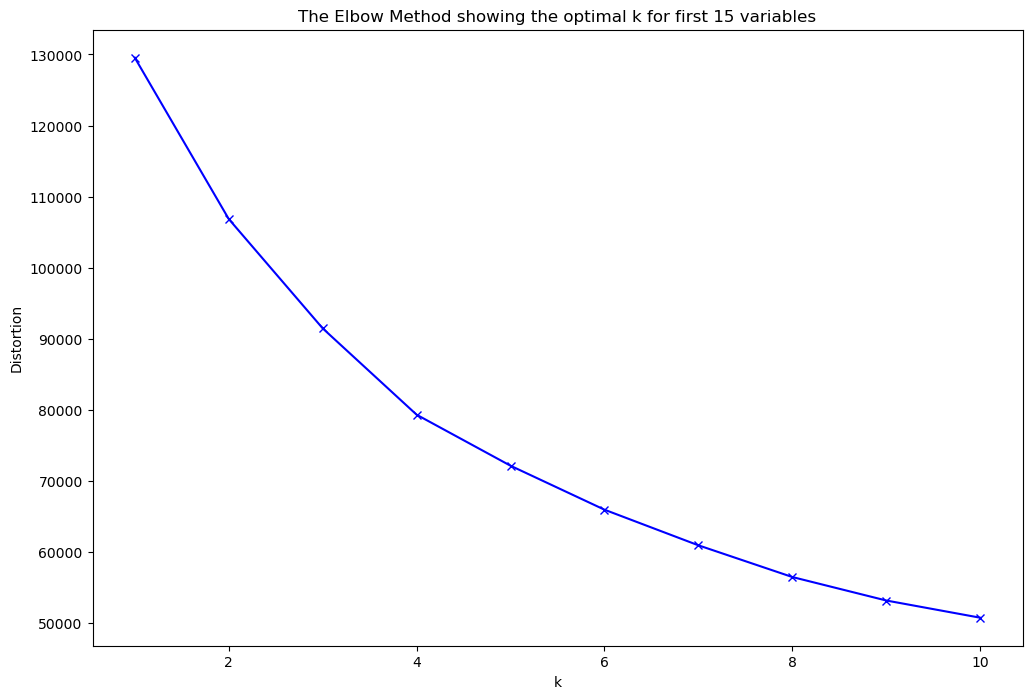

In [43]:
features_15 = df.iloc[:, 0:15]

# Feature normalization
scaler = StandardScaler()
normfeatures_15 = scaler.fit_transform(features_15)

distortions15 = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeanModel.fit_predict(normfeatures_15)
    distortions15.append(kmeanModel.inertia_)
    
print(distortions15)
plt.figure(figsize=(12,8))
plt.plot(K, distortions15, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for first 15 variables')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

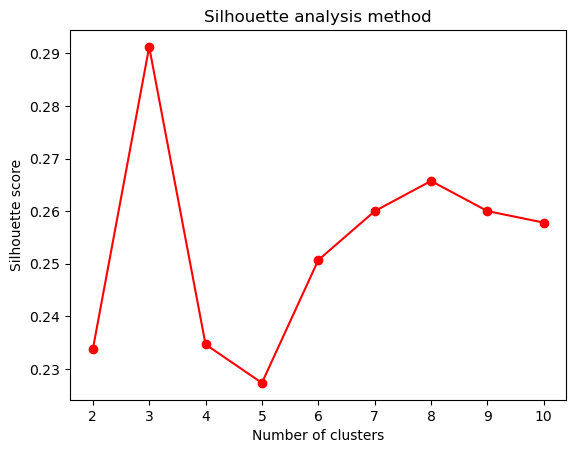

In [44]:
# We can also confirm the optimal k using Silhouette analysis method
from sklearn.metrics import silhouette_samples

sil_list15 = []

for i in range(2, 11):
    model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    sil_list15.append(silhouette_samples(normfeatures_15, model.fit_predict(normfeatures_15)).mean())

plt.figure()
plt.plot(range(2, 11), sil_list15, c='r', marker='o')
plt.title('Silhouette analysis method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

I am selecting optimal value of k = 3

In [45]:
# K-means clustering with K*=3
kmeans15 = KMeans(n_clusters=3, random_state=42)
kmeans15.fit_predict(normfeatures_15)

# Cluster user distribution
cluster_labels15 = kmeans15.labels_
cluster_user_counts15 = np.unique(cluster_labels15, return_counts=True)[1]
print("Cluster User Distribution:")
print(cluster_user_counts15)

# Cluster centroids
cluster_centroids15 = kmeans15.cluster_centers_
print("\nCluster Centroids:")
for cluster_idx in range(3):
    print(f"Cluster {cluster_idx + 1}:")
    print(cluster_centroids15[cluster_idx])

# Cluster scatter
cluster_scatters15 = []
for cluster_idx in range(3):
    cluster_members = cluster_labels15 == cluster_idx
    cluster_samples = normfeatures_15[cluster_members]
    cluster_centroid = cluster_centroids15[cluster_idx]
    distances = np.linalg.norm(cluster_samples - cluster_centroid, axis=1)
    cluster_scatter = np.mean(distances)
    cluster_scatters15.append(cluster_scatter)
print("\nCluster Scatter:")
for cluster_idx in range(3):
    print(f"Cluster {cluster_idx + 1}: {cluster_scatters15[cluster_idx]:.2f}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster User Distribution:
[5948 1500 1188]

Cluster Centroids:
Cluster 1:
[-0.36196919 -0.16344445 -0.23157478 -0.203079   -0.17419681 -0.30702905
 -0.06190909 -0.23020872 -0.05192187 -0.32684631 -0.29673465 -0.24390554
 -0.33512904 -0.28554378 -0.13420524]
Cluster 2:
[ 1.1669734   0.31046458 -0.29622688 -0.21250548 -0.30990574  1.41226864
 -0.65386067 -0.31112927 -0.56327925  1.58076     1.37804607 -0.37297111
  0.61884202  0.47353311  0.39078508]
Cluster 3:
[ 0.34140618  0.42712     1.53334831  1.28506167  1.26322378 -0.24306024
  1.13454747  1.54529761  0.9703093  -0.35626507 -0.25146619  1.69187601
  0.89814181  0.83302433  0.17939825]

Cluster Scatter:
Cluster 1: 2.30
Cluster 2: 3.35
Cluster 3: 4.00


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[17272.000000000586, 9824.096711224613, 3126.6448537454253, 2414.952143391014, 1760.2713260977735, 1181.142702957848, 1002.0324478904092, 837.6540778219244, 628.9647905597162, 562.7988128113616]


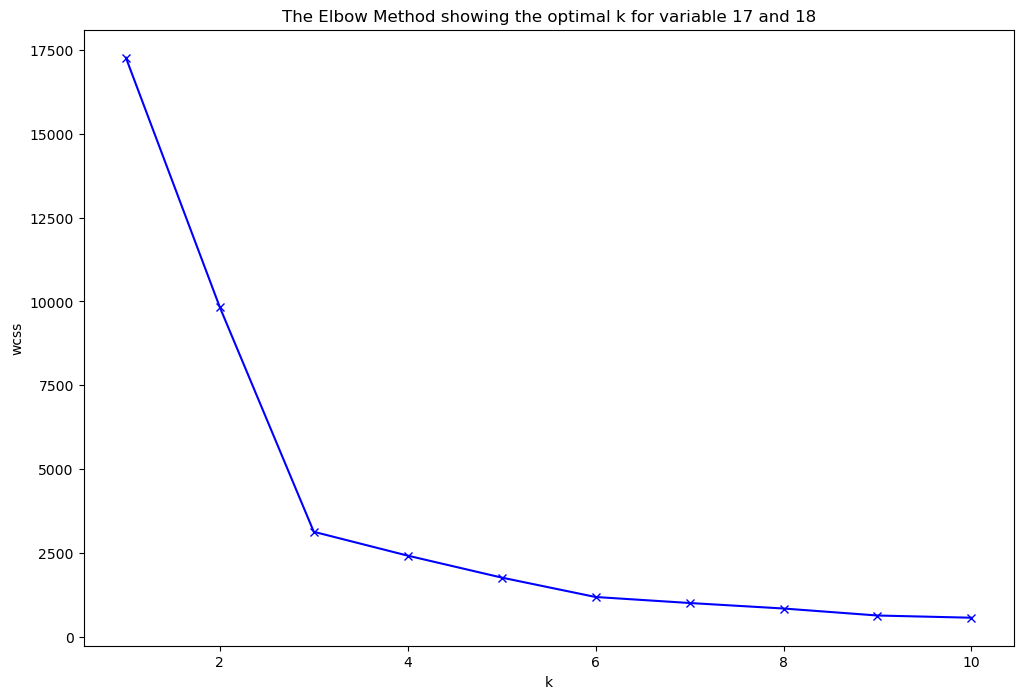

In [46]:
# Variable 17 and 18:
selected_two = df.iloc[:, 15:17]

# Feature normalization
scaler2 = StandardScaler()
normalized_two = scaler2.fit_transform(selected_two)

wcss = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeanModel.fit_predict(normalized_two)
    wcss.append(kmeanModel.inertia_)
    
print(wcss)
plt.figure(figsize=(12,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('wcss')
plt.title('The Elbow Method showing the optimal k for variable 17 and 18')
plt.show()

I can see from the above graph that optimal k value is 3

In [47]:
# K-means clustering with K*=3
kmeans2 = KMeans(n_clusters=3, random_state=42)
kmeans2.fit_predict(normalized_two)

# Cluster membership distribution
cluster_labels2 = kmeans2.labels_
cluster_user_counts2= np.unique(cluster_labels2, return_counts=True)[1]
print("Cluster User Distribution:")
print(cluster_user_counts2)

# Cluster centroids
cluster_centroids2 = kmeans2.cluster_centers_
print("\nCluster Centroids:")
for cluster_idx in range(3):
    print(f"Cluster {cluster_idx + 1}:")
    print(cluster_centroids2[cluster_idx])

# Cluster scatter
cluster_scatters2 = []
for cluster_idx in range(3):
    cluster_members = cluster_labels2 == cluster_idx
    cluster_samples = normalized_two[cluster_members]
    cluster_centroid = cluster_centroids2[cluster_idx]
    distances = np.linalg.norm(cluster_samples - cluster_centroid, axis=1)
    cluster_scatter = np.mean(distances)
    cluster_scatters2.append(cluster_scatter)
print("\nCluster Scatter:")
for cluster_idx in range(3):
    print(f"Cluster {cluster_idx + 1}: {cluster_scatters2[cluster_idx]:.2f}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster User Distribution:
[6673 1276  687]

Cluster Centroids:
Cluster 1:
[-0.40370382  0.27756014]
Cluster 2:
[2.11087564 0.24039743]
Cluster 3:
[ 6.37921119e-04 -3.14251231e+00]

Cluster Scatter:
Cluster 1: 0.28
Cluster 2: 0.70
Cluster 3: 1.15


When utilizing 15 variables for K-means clustering, the analysis revealed three distinctive user clusters with varying sizes and credit card usage patterns. These clusters, characterized by lower, higher, and intermediate values across the comprehensive set of features, reflected diverse user behaviors. The scatter analysis further highlighted the distribution patterns, with some clusters exhibiting more concentrated user groups and others showing higher scattering. This comprehensive approach considered a multitude of factors, providing a nuanced understanding of credit card users.

In the focused scenario considering only variables 17 (percent of full payment) and 18 (tenure of credit card service), the clustering also yielded three distinctive clusters. These clusters demonstrated unique patterns based on users' full payment percentages and tenure, presenting a simplified yet meaningful representation of user segments. Notably, the tighter packing of clusters in the 2-variable scenario indicated the pivotal role of full payment percentages and tenure in shaping user segments. The centroids of each cluster in this simplified scenario unveiled specific patterns, emphasizing the significance of these two features in characterizing user behaviors. These findings underscore the profound impact of feature selection on the granularity and interpretability of clustering results, enabling analysts to tailor their approach based on specific goals and sought-after insights.

In [54]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [63]:
feature_sel6 = df[["PAYMENTS","PURCHASES_FREQUENCY", "TENURE", "BALANCE_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "PRC_FULL_PAYMENT"]]
feature_sel6

,PAYMENTS,PURCHASES_FREQUENCY,TENURE,BALANCE_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT
CUST_ID,,,,,,
C10001,201.802084,0.166667,12,0.818182,0.000000,0.000000
C10002,4103.032597,0.000000,12,0.909091,0.250000,0.222222
C10003,622.066742,1.000000,12,1.000000,0.000000,0.000000
C10005,678.334763,0.083333,12,1.000000,0.000000,0.000000
C10006,1400.057770,0.666667,12,1.000000,0.000000,0.000000
...,...,...,...,...,...,...
C19184,58.644883,0.166667,6,0.500000,0.000000,0.000000
C19186,325.594462,1.000000,6,1.000000,0.000000,0.500000
C19188,81.270775,0.833333,6,0.833333,0.000000,0.250000


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[51816.000000000015, 42059.74743470168, 34619.1643744008, 28399.555488424197, 23736.953846185555, 19566.362650703253, 16646.963776638695, 15531.228448801343, 14409.138842621842, 13555.57622677416]


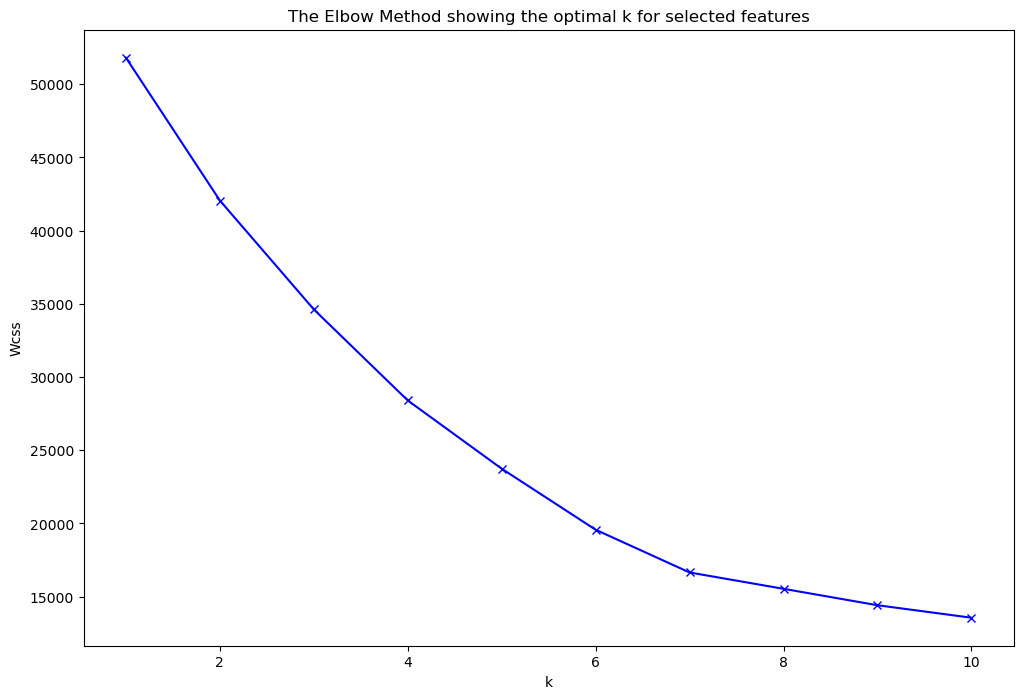

In [64]:
# Feature normalization
scaler6 = StandardScaler()
norm_sel = scaler6.fit_transform(feature_sel6)

wcss6 = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeanModel.fit_predict(norm_sel)
    wcss6.append(kmeanModel.inertia_)
    
print(wcss6)
plt.figure(figsize=(12,8))
plt.plot(K, wcss6, 'bx-')
plt.xlabel('k')
plt.ylabel('Wcss')
plt.title('The Elbow Method showing the optimal k for selected features')
plt.show()

I am selecting optimal K = 7 from above K means elbow method graph

In [65]:
# K-means clustering with K*=7
kmeans7 = KMeans(n_clusters=7, random_state=42)
kmeans7.fit_predict(norm_sel)

# Cluster membership distribution
cluster_labels7 = kmeans7.labels_
cluster_user_counts7 = np.unique(cluster_labels7, return_counts=True)[1]
print("Cluster User Distribution:")
print(cluster_user_counts7)

# Cluster centroids
cluster_centroids7 = kmeans7.cluster_centers_
print("\nCluster Centroids:")
for cluster_idx in range(7):
    print(f"Cluster {cluster_idx + 1}:")
    print(cluster_centroids7[cluster_idx])

# Cluster scatter
cluster_scatters7 = []
for cluster_idx in range(7):
    cluster_members = cluster_labels7 == cluster_idx
    cluster_samples = norm_sel[cluster_members]
    cluster_centroid = cluster_centroids7[cluster_idx]
    distances = np.linalg.norm(cluster_samples - cluster_centroid, axis=1)
    cluster_scatter = np.mean(distances)
    cluster_scatters7.append(cluster_scatter)
print("\nCluster Scatter:")
for cluster_idx in range(7):
    print(f"Cluster {cluster_idx + 1}: {cluster_scatters7[cluster_idx]:.2f}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster User Distribution:
[ 138  987 2359 1003  622  934 2593]

Cluster Centroids:
Cluster 1:
[ 5.66412736  0.25839688  0.22804229 -0.06842744  0.7228249   0.39236215]
Cluster 2:
[ 0.03313944  0.9291814   0.21451694  0.13138515 -0.64214326  2.20425543]
Cluster 3:
[-0.24697986 -0.9362004   0.27013431  0.38596248 -0.03691627 -0.47692888]
Cluster 4:
[-0.22351381 -0.55157225  0.20763424 -2.32267901 -0.48575701  0.19510029]
Cluster 5:
[-0.36414869 -0.13148945 -3.22595138 -0.28099346  0.34850585 -0.014271  ]
Cluster 6:
[ 0.31830304 -0.53226043  0.14201291  0.41331612  2.09857316 -0.41694805]
Cluster 7:
[-0.03021323  0.92089494  0.30281515  0.4194632  -0.41206813 -0.34787906]

Cluster Scatter:
Cluster 1: 3.37
Cluster 2: 1.18
Cluster 3: 0.83
Cluster 4: 1.55
Cluster 5: 2.10
Cluster 6: 1.49
Cluster 7: 0.90


In the analysis with a refined set of features exhibiting low correlation (below 0.3) and focusing on only 6 variables, the clustering results delineate seven distinct user clusters. Each cluster, characterized by its unique centroid vector, represents average values across the selected features, providing insights into specific financial behaviors. Notable variations in user distribution and credit card usage patterns are apparent, with scatter analyses offering a glimpse into the dispersion of users within each cluster. For instance, Cluster 5 stands out with a scatter of 2.10, indicating a broader distribution, while Cluster 3 demonstrates a more concentrated grouping with a lower scatter of 0.83. This nuanced approach, considering fewer features but maintaining low correlation, enhances the granularity of user segmentation, offering a detailed understanding of diverse financial behaviors among distinct user groups. Feature selection proves pivotal in uncovering these nuanced patterns and tailoring analyses to extract meaningful insights.

Mean Vectors:
[[-0.2030156  -0.10390317  0.35518066  0.50540465  0.1340577  -0.53772694]
 [ 1.06710638  0.09449368  0.35518066  0.50540465  0.47919929 -0.1514297 ]
 [-0.18196628  0.42504988  0.35518066 -0.66673746 -0.68195251  0.94668376]
 [-0.37863237  0.7918634  -2.05737895 -0.23079925 -0.68195251  1.17108645]
 [ 1.43212064 -0.37944484  0.35518066 -0.92059899  0.15690077  0.55706655]
 [-0.39663758 -0.59273369 -1.65701392 -0.39472727  0.5170508  -0.53772694]
 [ 0.65322341 -0.44004242 -1.8289091  -0.38488229  0.95166221  0.36159424]]

Covariance Matrices:
[[[ 1.26921784e-01  9.25698442e-02 -1.17789509e-30 -1.63175578e-30
    7.80782679e-02  1.73717452e-30]
  [ 9.25698442e-02  1.02103464e+00 -5.60166872e-31 -7.71222994e-31
   -3.12668808e-01  8.13691448e-31]
  [-1.18530327e-30 -5.49054593e-31  1.00000000e-06  2.88427268e-30
    7.68255219e-31 -3.04451006e-30]
  [-1.61776254e-30 -7.78039554e-31  2.88427268e-30  1.00000000e-06
    1.03245961e-30 -4.21547546e-30]
  [ 7.80782679e-02 -3.1266

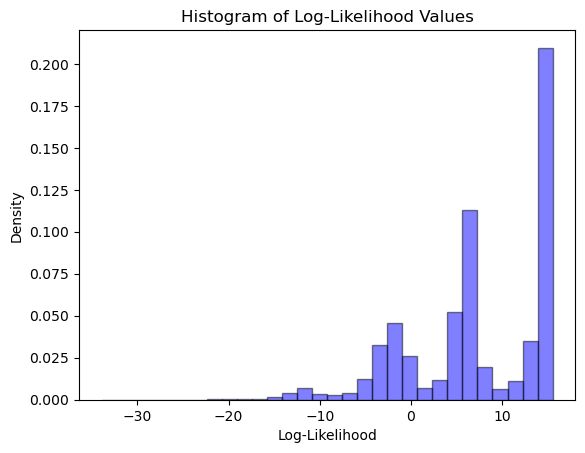

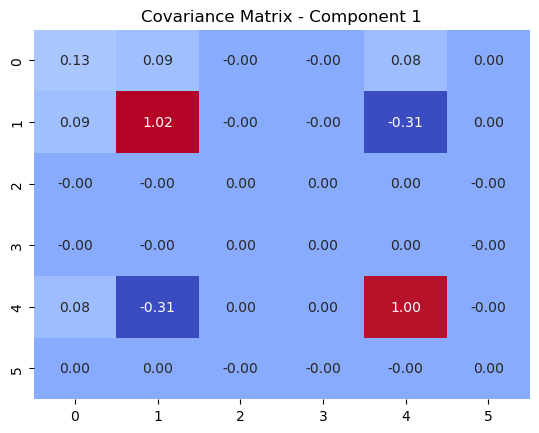

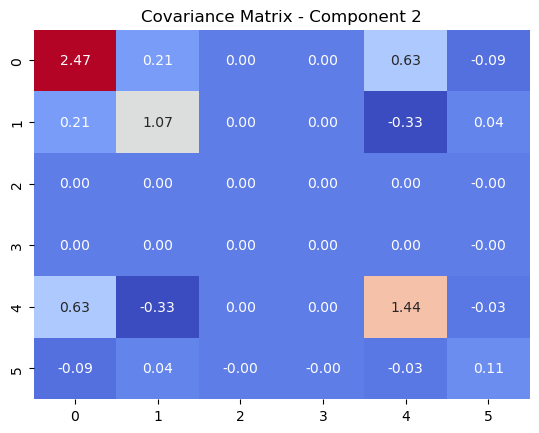

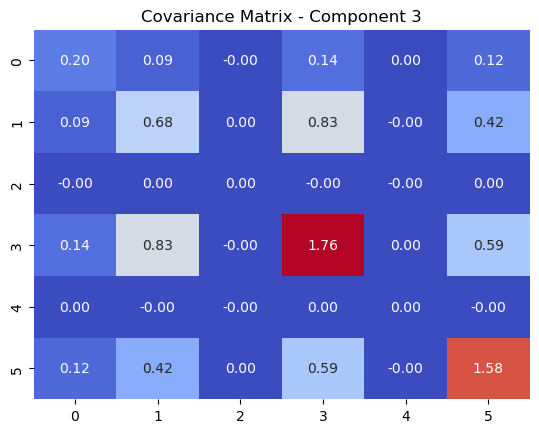

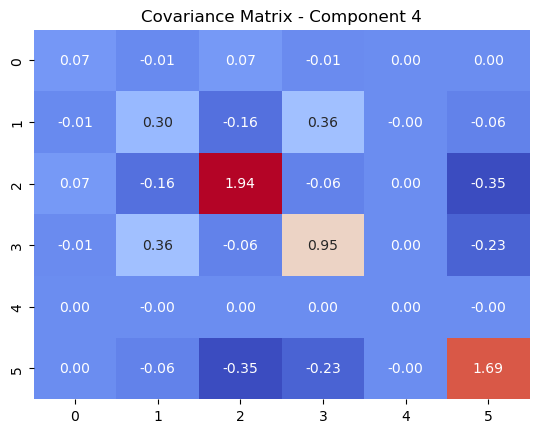

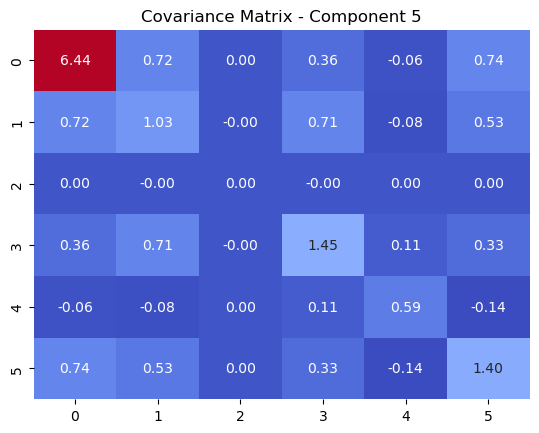

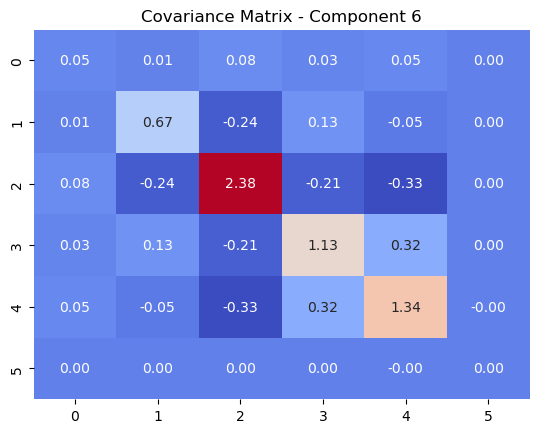

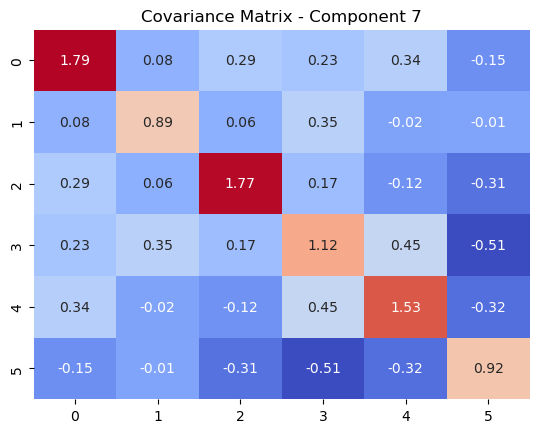

In [66]:
# GMM:
from sklearn.mixture import GaussianMixture

# Fit GMM model
gmm = GaussianMixture(n_components=7, random_state=42)
gmm.fit(norm_sel)

# Report mean vector and covariance matrix for each Gaussian
print("Mean Vectors:")
print(gmm.means_)
print("\nCovariance Matrices:")
print(gmm.covariances_)

# Compute log-likelihood of each sample belonging to the GMM
log_likelihood = gmm.score_samples(norm_sel)

# Plot histogram of log-likelihood values
plt.hist(log_likelihood, bins=30, density=True, alpha=0.5, color='blue', edgecolor='black')
plt.title('Histogram of Log-Likelihood Values')
plt.xlabel('Log-Likelihood')
plt.ylabel('Density')
plt.show()

# Visualize covariance matrices using a heatmap
covariance_matrices = gmm.covariances_

# Assuming you have seaborn and matplotlib installed
for i in range(7):
    sns.heatmap(covariance_matrices[i], annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
    plt.title(f'Covariance Matrix - Component {i + 1}')
    plt.show()
    

The log-likelihood graph shows that the distribution is skewed to the right. Most data points have a log-likelyhood close to a value 7 with a long til extending towards the negative values. The range of log likelihood values is relatively small, suggesting that the data is not very noisy. Most of the values are positive, suggesting that the GMM is a good fit for the data. The log likelihood values are relatively high, suggesting that the GMM is able to learn the underlying distribution of the data. Hence, we could say our model captured most of the characteristics well.

The mean vectors and covariance matrices obtained from the Gaussian Mixture Models (GMMs) provide detailed insights into 
the characteristics of each cluster. Examining the mean vectors reveals specific attribute profiles associated with each 
cluster. For instance, Cluster 1 is characterized by negative values in the first and second features, coupled with positive values in the fourth and fifth features. In contrast, Cluster 3 exhibits positive values in the second and fourth features, distinguishing it from other clusters. These distinct mean vectors underscore the granularity of the clustering results, highlighting subtle differences in feature contributions across various user segments.

Analyzing the covariance matrices further refines our understanding of the relationships between features within each cluster. For example, in Cluster 5, the covariance between the first and fifth features is notably high, suggesting a strong correlation between these attributes within this user segment. Conversely, the covariance matrix of Cluster 2 indicates weaker correlations between features, emphasizing the diversity of behaviors within this cluster. These covariance patterns shed light on the interplay between different features, offering nuanced insights into the structure of user behavior. Overall, the specific values in the mean vectors and covariance matrices contribute to a detailed and actionable understanding of user segments, enabling targeted strategies based on the distinctive patterns exhibited by each cluster.